# **DATA PREPROCESSING**

## Importing Necessary Libraries

In [68]:
import pandas as pd  # Used for DataFrame
import numpy as np   # Used for Array
import matplotlib.pyplot as plt  # Used for visualization
import seaborn as sns

## Reading the Dataset

In [69]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic (1).csv


In [70]:
df = pd.read_csv('titanic.csv')  # Reading the csv file

In [71]:
df

,PassengerId,Survived,Ticket_class,Name,Sex,Age,Siblings,Parch,Ticket,Fare,Cabin Number,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [72]:
df.head()

,PassengerId,Survived,Ticket_class,Name,Sex,Age,Siblings,Parch,Ticket,Fare,Cabin Number,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
df.tail(3)

,PassengerId,Survived,Ticket_class,Name,Sex,Age,Siblings,Parch,Ticket,Fare,Cabin Number,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Sanity Check of Data

In [74]:
df.shape

(891, 12)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Ticket_class  891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   Siblings      891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin Number  204 non-null    object 
 11  Embarked      889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
df.describe(include='all')  # numerical as well as categorical

,PassengerId,Survived,Ticket_class,Name,Sex,Age,Siblings,Parch,Ticket,Fare,Cabin Number,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Finding Missing Values**

---


In [77]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Ticket_class,0
Name,0
Sex,0
Age,177
Siblings,0
Parch,0
Ticket,0
Fare,0


In [78]:
df.isnull().sum()/df.shape[0]*100

,0
PassengerId,0.000000
Survived,0.000000
Ticket_class,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
Siblings,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


If the missing value percentage exceeds 50% then we can delete that column else we will replace the missing values

In [79]:
# Drop the 'Cabin' column because it has too many missing values
df.drop(columns=['Cabin Number'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Ticket_class  891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   Siblings      891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Embarked      889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [80]:
df.shape

(891, 11)

In [81]:
df.duplicated().sum()

0

In [82]:
for i in df.select_dtypes(include='object').columns:  # Checking for garbage value
   print(df[i].value_counts())
   print('---'*10)

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
------------------------------
Sex
male      577
female    314
Name: count, dtype: int64
------------------------------
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
------------------------------
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
------------------------------


In [83]:
# "Embarked" refers to the port of embarkation, or the port where a passenger boarded the ship.
# The possible values for "embarked" are C for Cherbourg, Q for Queenstown, and S for Southampton.
df['Embarked'] = df['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})

In [84]:
df['Embarked']

,Embarked
0,Southampton
1,Cherbourg
2,Southampton
3,Southampton
4,Southampton
...,...
886,Southampton
887,Southampton
888,Southampton
889,Cherbourg


## Missing Value Treatment

**Method of Imputing Missing Values with mean,median,mode or some algorithms like KNNImputer**

**KNNImputer is used for filling the numerical data and is widely used in Industries, mean and median is used for numerical and continuous data while mode is used for categorical and discrete value**

In [85]:
#Finding and locating position of missing values

In [86]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Ticket_class,0
Name,0
Sex,0
Age,177
Siblings,0
Parch,0
Ticket,0
Fare,0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Ticket_class  891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   Siblings      891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Embarked      889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [88]:
df[df['Age'].isnull()]

,PassengerId,Survived,Ticket_class,Name,Sex,Age,Siblings,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Queenstown
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,Southampton
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,Cherbourg
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,Cherbourg
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Queenstown
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,Cherbourg
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,Southampton
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,Southampton
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,Southampton


In [89]:
df[df['Age'].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [90]:
df['Age'].iloc[26:30]

,Age
26,NaN
27,19.0
28,NaN
29,NaN


In [91]:
df.iloc[17:19,5]

,Age
17,NaN
18,31.0


In [92]:
df.loc[29,'Age']

nan

In [93]:
df.loc[30:32,'Age']

,Age
30,40.0
31,NaN
32,NaN


In [94]:
# Replacing Missing Values

In [95]:
# As in the Age column there are 177 missing values and it's datatype is of float which is numerical so we can use mean, median or KNNImputer
# For this column, we will use KNNImpuer algorithm
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df[['Age']] = imputer.fit_transform(df[['Age']])

In [96]:
# We are not getting any index that means no null value is there
df[df['Age'].isnull()].index

Index([], dtype='int64')

In [97]:
# You can check this by same approach by which we had located the missing values, we had previously seen for index 26,28 and 29 we were shown NaN
df['Age'].iloc[26:30]

,Age
26,29.699118
27,19.000000
28,29.699118
29,29.699118


In [98]:
# All the numerical data is alright, only in the 'Embarked' there is 2 missing values of object type
df.isnull().sum()

,0
PassengerId,0
Survived,0
Ticket_class,0
Name,0
Sex,0
Age,0
Siblings,0
Parch,0
Ticket,0
Fare,0


In [99]:
# As 'Embarked' column missing values are of object type so we can replace it by the highest occuring (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
print(df['Embarked'])

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: Embarked, Length: 891, dtype: object


<ipython-input-99-40a917e727cb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [100]:
# No more missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Ticket_class,0
Name,0
Sex,0
Age,0
Siblings,0
Parch,0
Ticket,0
Fare,0


## Duplicates and Garbage Value Treatments

**Duplicates refer to rows or entries in a DataFrame that are repeated entirely or partially.**

**Garbage values are invalid, inconsistent, or outlier values that do not fit the expected pattern of the dataset.**

In [101]:
df.duplicated().sum()  # Returns the number of duplicate row

0

In [102]:
df.columns

Index(['PassengerId', 'Survived', 'Ticket_class', 'Name', 'Sex', 'Age',
       'Siblings', 'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [103]:
# PassengerId should be unique so checking whether all the data are unique in that column or not
df['PassengerId'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [104]:
# It drops all the duplicated rows by keeping the first
df = df.drop_duplicates()

In [105]:
# Checking for any object like special character in numeric columns, if found then garbage value should be replaced
for i in df.select_dtypes(include='object').columns:
   print(df[i].value_counts())
   print('---'*10)

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
------------------------------
Sex
male      577
female    314
Name: count, dtype: int64
------------------------------
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
------------------------------
Embarked
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64
-------

In [106]:
df['Age'] = df['Age'].astype(int)   # Age cannot be in decimal

In [107]:
df_positive = df[(df.select_dtypes(include=['number']) >= 0).all(axis=1)] #Checking only the numeric columns for non-negative values
print(df_positive)  # Keeps only rows where all values are non-negative
# As there is no negative values so the dataframe remains same

     PassengerId  Survived  Ticket_class  \
0              1         0             3   
1              2         1             1   
2              3         1             3   
3              4         1             1   
4              5         0             3   
..           ...       ...           ...   
886          887         0             2   
887          888         1             1   
888          889         0             3   
889          890         1             1   
890          891         0             3   

                                                  Name     Sex  Age  Siblings  \
0                              Braund, Mr. Owen Harris    male   22         1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38         1   
2                               Heikkinen, Miss. Laina  female   26         0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35         1   
4                             Allen, Mr. William Henry    male   3

## Outlier Detection

**Outliers are data points that significantly deviate from the rest of the dataset. They are extremely high or low values that don't follow the overall pattern.**

**Outliers may be due to data entry errors (e.g., 10,000 instead of 100).
Identifying them ensures data integrity.**

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Ticket_class  891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    int64  
 6   Siblings      891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Embarked      891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


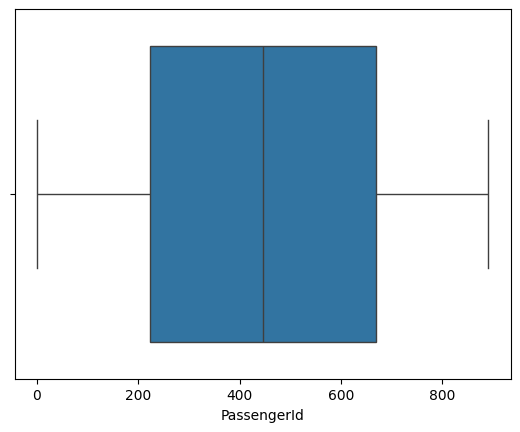

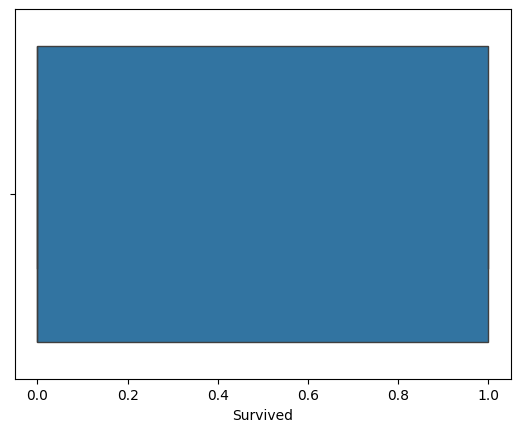

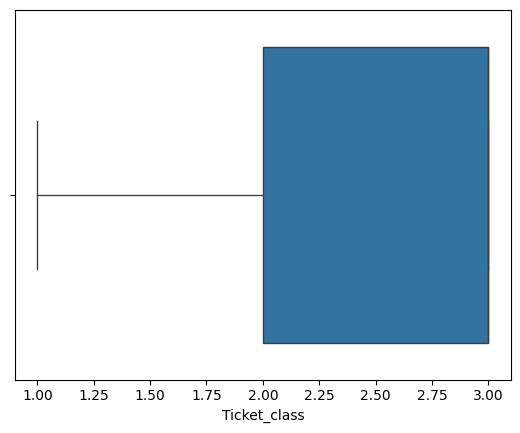

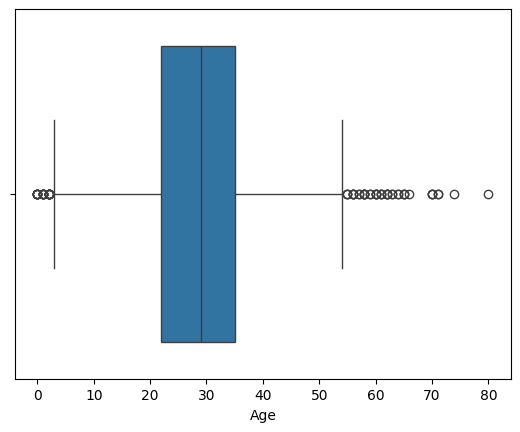

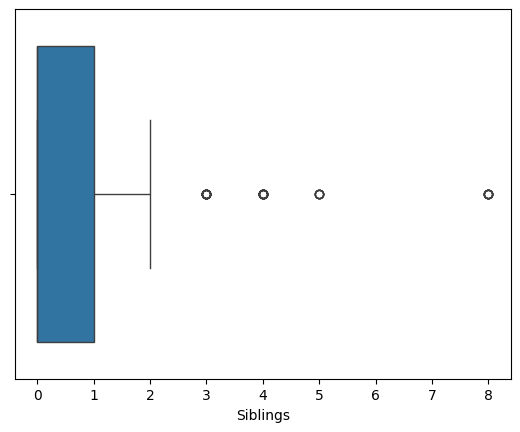

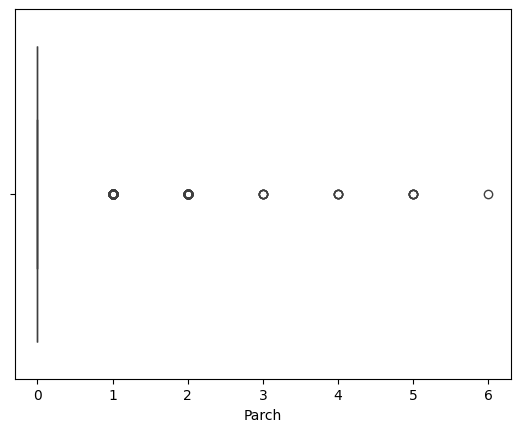

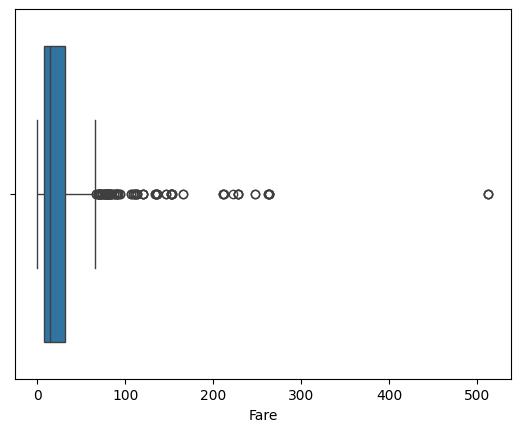

In [109]:
for i in df.select_dtypes(include='number').columns:
   sns.boxplot(x=df[i])
   plt.show()

## Outlier Treatment

**If outliers result from data entry errors or are not meaningful, they can be removed.**

**If outliers are important but need adjustment, transformation methods help.**

**Instead of deleting outliers, replace them with a more meaningful value.**

**Decide whether to do the outlier treatment or not? Outlier treatment is done only for numerical continuous data column.**

In [110]:
df

,PassengerId,Survived,Ticket_class,Name,Sex,Age,Siblings,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,Southampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29,1,2,W./C. 6607,23.4500,Southampton
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,Cherbourg


In [111]:
# Sorting by Age in ascending order
sorted_by_age_asc = df.sort_values(by="Age", ascending=True)

# Sorting by Age in descending order
sorted_by_age_desc = df.sort_values(by="Age", ascending=False)

# Display top 5 rows
print(sorted_by_age_asc.head())  # Youngest passengers first
print(sorted_by_age_desc.head()) # Oldest passengers first


     PassengerId  Survived  Ticket_class                             Name  \
644          645         1             3           Baclini, Miss. Eugenie   
78            79         1             2    Caldwell, Master. Alden Gates   
469          470         1             3    Baclini, Miss. Helene Barbara   
831          832         1             2  Richards, Master. George Sibley   
305          306         1             1   Allison, Master. Hudson Trevor   

        Sex  Age  Siblings  Parch  Ticket      Fare     Embarked  
644  female    0         2      1    2666   19.2583    Cherbourg  
78     male    0         0      2  248738   29.0000  Southampton  
469  female    0         2      1    2666   19.2583    Cherbourg  
831    male    0         1      1   29106   18.7500  Southampton  
305    male    0         1      2  113781  151.5500  Southampton  
     PassengerId  Survived  Ticket_class  \
630          631         1             1   
851          852         0             3   
96 

In [112]:
df[df['Age']==0]

,PassengerId,Survived,Ticket_class,Name,Sex,Age,Siblings,Parch,Ticket,Fare,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0,0,2,248738,29.0000,Southampton
305,306,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,Southampton
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0,2,1,2666,19.2583,Cherbourg
644,645,1,3,"Baclini, Miss. Eugenie",female,0,2,1,2666,19.2583,Cherbourg
755,756,1,2,"Hamalainen, Master. Viljo",male,0,1,1,250649,14.5000,Southampton
803,804,1,3,"Thomas, Master. Assad Alexander",male,0,0,1,2625,8.5167,Cherbourg
831,832,1,2,"Richards, Master. George Sibley",male,0,1,1,29106,18.7500,Southampton


In [113]:
mean_age = int(df[df["Age"] > 0]["Age"].mean())  # Replacing the age 0 by mean age
df.loc[df["Age"] == 0, "Age"] = mean_age

In [114]:
df[df['Age']==0] # No more 0 age data

,PassengerId,Survived,Ticket_class,Name,Sex,Age,Siblings,Parch,Ticket,Fare,Embarked


In [115]:
sorted_by_fare_asc = df.sort_values(by="Fare", ascending=True)
sorted_by_fare_desc = df.sort_values(by="Fare", ascending=False)
print(sorted_by_fare_asc.head())
print(sorted_by_fare_desc.head())

     PassengerId  Survived  Ticket_class                             Name  \
271          272         1             3     Tornquist, Mr. William Henry   
597          598         0             3              Johnson, Mr. Alfred   
302          303         0             3  Johnson, Mr. William Cahoone Jr   
633          634         0             1    Parr, Mr. William Henry Marsh   
277          278         0             2      Parkes, Mr. Francis "Frank"   

      Sex  Age  Siblings  Parch  Ticket  Fare     Embarked  
271  male   25         0      0    LINE   0.0  Southampton  
597  male   49         0      0    LINE   0.0  Southampton  
302  male   19         0      0    LINE   0.0  Southampton  
633  male   29         0      0  112052   0.0  Southampton  
277  male   29         0      0  239853   0.0  Southampton  
     PassengerId  Survived  Ticket_class                                Name  \
258          259         1             1                    Ward, Miss. Anna   
737        

In [116]:
min_fare = df[df["Fare"] > 0]["Fare"].min()
df.loc[df["Fare"] == 0, "Fare"] = min_fare

In [117]:
sorted_by_fare_asc = df.sort_values(by="Fare", ascending=True)
sorted_by_fare_desc = df.sort_values(by="Fare", ascending=False)
print(sorted_by_fare_asc.head())
print(sorted_by_fare_desc.head())

     PassengerId  Survived  Ticket_class                             Name  \
271          272         1             3     Tornquist, Mr. William Henry   
597          598         0             3              Johnson, Mr. Alfred   
302          303         0             3  Johnson, Mr. William Cahoone Jr   
633          634         0             1    Parr, Mr. William Henry Marsh   
277          278         0             2      Parkes, Mr. Francis "Frank"   

      Sex  Age  Siblings  Parch  Ticket    Fare     Embarked  
271  male   25         0      0    LINE  4.0125  Southampton  
597  male   49         0      0    LINE  4.0125  Southampton  
302  male   19         0      0    LINE  4.0125  Southampton  
633  male   29         0      0  112052  4.0125  Southampton  
277  male   29         0      0  239853  4.0125  Southampton  
     PassengerId  Survived  Ticket_class                                Name  \
258          259         1             1                    Ward, Miss. Anna   

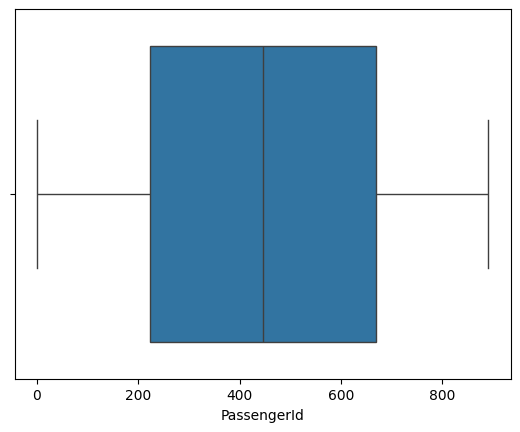

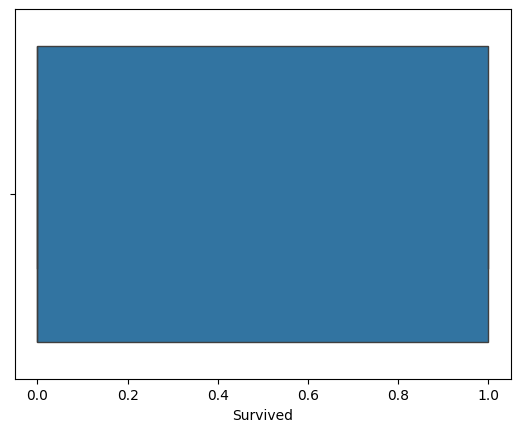

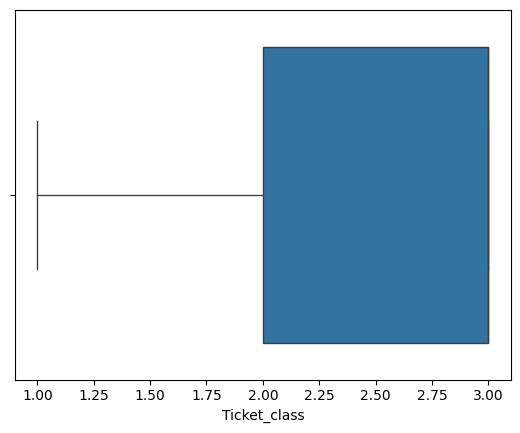

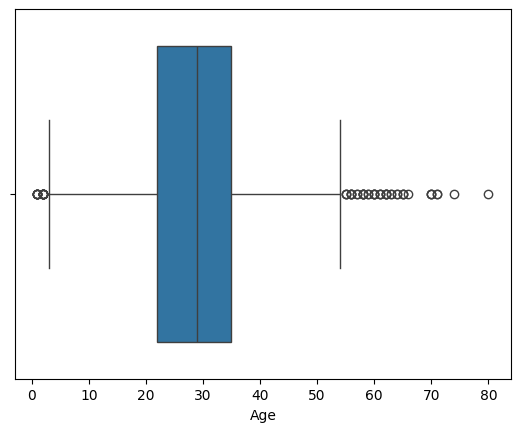

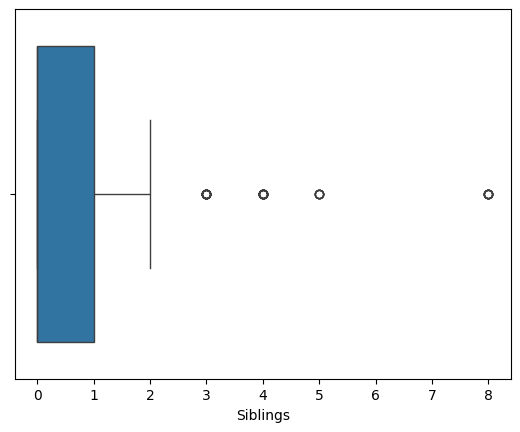

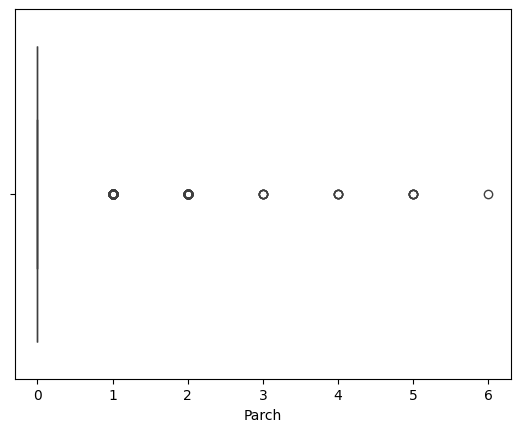

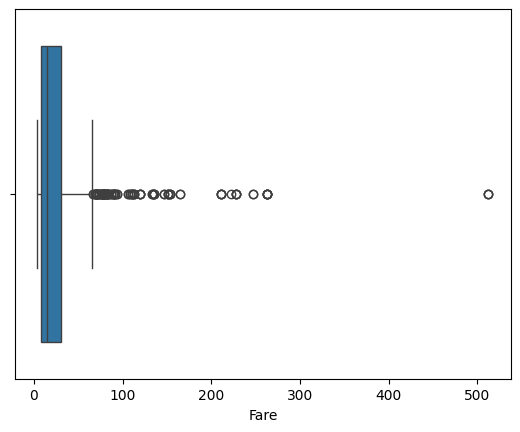

In [118]:
for i in df.select_dtypes(include='number').columns:
   sns.boxplot(x=df[i])
   plt.show()

## Encoding Of Data

**When dealing with categorical data (object type), we need to transform it into numerical form before feeding it into machine learning models.**

**We have 4 object type data columns but we won't encode for name and ticket columns, we will only encode the sex and embarked column**

In [119]:
# Convert 'Sex' to numerical values: male=1, female=0
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

In [121]:
# Convert 'Embarked' to numerical values: S=0, C=1, Q=2
df['Embarked'] = df['Embarked'].map({'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2})

In [122]:
df

,PassengerId,Survived,Ticket_class,Name,Sex,Age,Siblings,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30.0000,1


In [124]:
df.info() # Age and Embarked column is now typecasted to integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Ticket_class  891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    int64  
 5   Age           891 non-null    int64  
 6   Siblings      891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Embarked      891 non-null    int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 76.7+ KB
